<a href="https://colab.research.google.com/github/ArasHEsLaM1/machine_learning_with_python_jadi/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import time
#For LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers  import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model


In [5]:
%pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 12.1 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
import yfinance as yf

In [22]:
basic_data= yf.download("GBPUSD=X",start='2020-01-01',end='2022-07-12')


[*********************100%***********************]  1 of 1 completed


In [8]:
basic_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1.325400,1.327100,1.321877,1.326260,1.326260,0
2020-01-02,1.325047,1.326788,1.312508,1.325030,1.325030,0
2020-01-03,1.314389,1.316119,1.305483,1.315270,1.315270,0
2020-01-06,1.308130,1.317400,1.306540,1.308010,1.308010,0
2020-01-07,1.317193,1.321213,1.309638,1.317003,1.317003,0
...,...,...,...,...,...,...
2021-12-27,1.340520,1.344070,1.339226,1.340430,1.340430,0
2021-12-28,1.344447,1.346257,1.341832,1.344267,1.344267,0
2021-12-29,1.343400,1.349928,1.340914,1.343328,1.343328,0


In [9]:
basic_data.shape

(523, 6)

In [10]:
basic_data.head

<bound method NDFrame.head of                 Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2020-01-01  1.325400  1.327100  1.321877  1.326260   1.326260       0
2020-01-02  1.325047  1.326788  1.312508  1.325030   1.325030       0
2020-01-03  1.314389  1.316119  1.305483  1.315270   1.315270       0
2020-01-06  1.308130  1.317400  1.306540  1.308010   1.308010       0
2020-01-07  1.317193  1.321213  1.309638  1.317003   1.317003       0
...              ...       ...       ...       ...        ...     ...
2021-12-27  1.340520  1.344070  1.339226  1.340430   1.340430       0
2021-12-28  1.344447  1.346257  1.341832  1.344267   1.344267       0
2021-12-29  1.343400  1.349928  1.340914  1.343328   1.343328       0
2021-12-30  1.349764  1.352155  1.345533  1.349879   1.349879       0
2021-12-31  1.349892  1.354848  1.346747  1.349837   1.349837       0

[523 rows x 6 columns]>

In [23]:
df=pd.DataFrame(basic_data)

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1.325400,1.327100,1.321877,1.326260,1.326260,0
2020-01-02,1.325047,1.326788,1.312508,1.325030,1.325030,0
2020-01-03,1.314389,1.316119,1.305483,1.315270,1.315270,0
2020-01-06,1.308130,1.317400,1.306540,1.308010,1.308010,0
2020-01-07,1.317193,1.321213,1.309638,1.317003,1.317003,0
...,...,...,...,...,...,...
2021-12-27,1.340520,1.344070,1.339226,1.340430,1.340430,0
2021-12-28,1.344447,1.346257,1.341832,1.344267,1.344267,0
2021-12-29,1.343400,1.349928,1.340914,1.343328,1.343328,0


In [24]:
df=df.drop(['Volume'], axis=1)

In [25]:
df


,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-01,1.325400,1.327100,1.321877,1.326260,1.326260
2020-01-02,1.325047,1.326788,1.312508,1.325030,1.325030
2020-01-03,1.314389,1.316119,1.305483,1.315270,1.315270
2020-01-06,1.308130,1.317400,1.306540,1.308010,1.308010
2020-01-07,1.317193,1.321213,1.309638,1.317003,1.317003
...,...,...,...,...,...
2022-07-04,1.210580,1.216515,1.208634,1.210273,1.210273
2022-07-05,1.211402,1.212606,1.190051,1.211446,1.211446
2022-07-06,1.194957,1.198638,1.187761,1.194914,1.194914


In [26]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-01,1.325400,1.327100,1.321877,1.326260,1.326260
2020-01-02,1.325047,1.326788,1.312508,1.325030,1.325030
2020-01-03,1.314389,1.316119,1.305483,1.315270,1.315270
2020-01-06,1.308130,1.317400,1.306540,1.308010,1.308010
2020-01-07,1.317193,1.321213,1.309638,1.317003,1.317003
...,...,...,...,...,...
2022-07-04,1.210580,1.216515,1.208634,1.210273,1.210273
2022-07-05,1.211402,1.212606,1.190051,1.211446,1.211446
2022-07-06,1.194957,1.198638,1.187761,1.194914,1.194914


In [27]:
df=df.drop(['Adj Close'], axis=1)

In [29]:
df

,Open,High,Low,Close
Date,,,,
2020-01-01,1.325400,1.327100,1.321877,1.326260
2020-01-02,1.325047,1.326788,1.312508,1.325030
2020-01-03,1.314389,1.316119,1.305483,1.315270
2020-01-06,1.308130,1.317400,1.306540,1.308010
2020-01-07,1.317193,1.321213,1.309638,1.317003
...,...,...,...,...
2022-07-04,1.210580,1.216515,1.208634,1.210273
2022-07-05,1.211402,1.212606,1.190051,1.211446
2022-07-06,1.194957,1.198638,1.187761,1.194914


In [28]:
df.describe

<bound method NDFrame.describe of                 Open      High       Low     Close
Date                                              
2020-01-01  1.325400  1.327100  1.321877  1.326260
2020-01-02  1.325047  1.326788  1.312508  1.325030
2020-01-03  1.314389  1.316119  1.305483  1.315270
2020-01-06  1.308130  1.317400  1.306540  1.308010
2020-01-07  1.317193  1.321213  1.309638  1.317003
...              ...       ...       ...       ...
2022-07-04  1.210580  1.216515  1.208634  1.210273
2022-07-05  1.211402  1.212606  1.190051  1.211446
2022-07-06  1.194957  1.198638  1.187761  1.194914
2022-07-07  1.191895  1.202183  1.191001  1.192321
2022-07-08  1.203196  1.205531  1.192194  1.202805

[658 rows x 4 columns]>

In [30]:
 df.tail()

,Open,High,Low,Close
Date,,,,
2022-07-04,1.210580,1.216515,1.208634,1.210273
2022-07-05,1.211402,1.212606,1.190051,1.211446
2022-07-06,1.194957,1.198638,1.187761,1.194914
2022-07-07,1.191895,1.202183,1.191001,1.192321
2022-07-08,1.203196,1.205531,1.192194,1.202805


In [31]:
df_close=df.reset_index()['Close']

In [32]:
df_close.shape


(658,)

In [33]:
df_close

0      1.326260
1      1.325030
2      1.315270
3      1.308010
4      1.317003
         ...   
653    1.210273
654    1.211446
655    1.194914
656    1.192321
657    1.202805
Name: Close, Length: 658, dtype: float64

In [37]:
%pip install TA-Lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 7.6 MB/s 
  ERROR: Failed building wheel for TA-Lib
  Running setup.py clean for TA-Lib
Failed to build TA-Lib
    Running setup.py install for TA-Lib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-kbcnph0k/ta-lib_d327c78f1cb845b0a8360dfc72cea2d5/setup.py'"'"'; __file__='"'"'/tmp/pip-install-kbcnph0k/ta-lib_d327c78f1cb845b0a8360dfc72cea2d5/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-gst5uol9/install-record.txt --single-version-externally-managed --compile --install-headers /u

In [39]:
%pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 8.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=56b942990c1aa22a2361112474dd1b29569aad08399bb1cd27d2ca7f342c6ed5
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


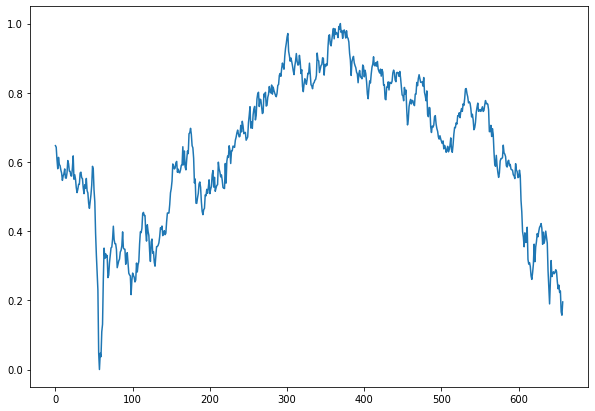

In [83]:
plt.figure(figsize=(10,7))
plt.plot(df_close)

In [40]:
import pandas_ta as ta

In [48]:
%pip install MetaTrader5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement MetaTrader5 (from versions: none)
ERROR: No matching distribution found for MetaTrader5


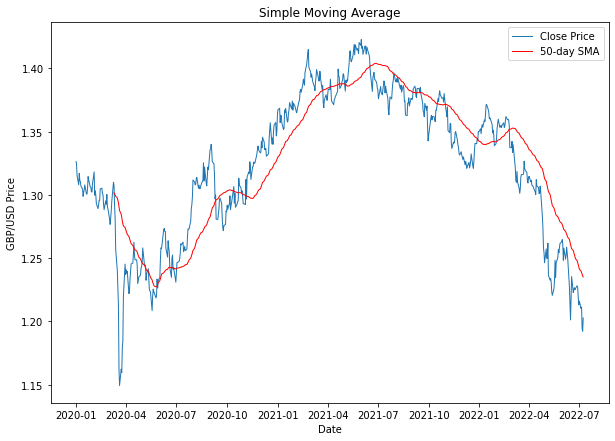

In [56]:
def SMA(data, ndays): 
    SMA = pd.Series(df['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data
n = 50
SMA = SMA(df,n)
SMA = SMA.dropna()
SMA = SMA['SMA']


# Plotting the Google stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('GBP/USD Price')

# Plot close price and moving averages
plt.plot(df['Close'],lw=1, label='Close Price')
plt.plot(SMA,'r',lw=1, label='50-day SMA')
# Add a legend to the axis
plt.legend()

plt.show()

In [ ]:
#PREPROCESSING THE DATA __TRAIN___TEST_

In [57]:
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [58]:
df_close.shape

(658, 1)

In [59]:
df_close

array([[0.64713112],
       [0.64262912],
       [0.60691114],
       [0.58034069],
       [0.61325076],
       [0.59264472],
       [0.58950044],
       [0.5767117 ],
       [0.56772603],
       [0.54670422],
       [0.55927001],
       [0.56610699],
       [0.57984028],
       [0.5536904 ],
       [0.55307175],
       [0.56859816],
       [0.60400027],
       [0.59491164],
       [0.57365031],
       [0.57302599],
       [0.56001475],
       [0.55908416],
       [0.58359885],
       [0.61750756],
       [0.55010242],
       [0.56299673],
       [0.54997851],
       [0.5254996 ],
       [0.51134617],
       [0.52109795],
       [0.53512573],
       [0.53549438],
       [0.56816188],
       [0.57040568],
       [0.55430992],
       [0.55183358],
       [0.5247649 ],
       [0.50830703],
       [0.53408127],
       [0.52415367],
       [0.55226725],
       [0.51694847],
       [0.51037282],
       [0.48040853],
       [0.46580748],
       [0.48545632],
       [0.50527138],
       [0.532

In [60]:
trainig_size=int(len(df_close)*0.65)
testing_size=len(df_close)-trainig_size
train_data,test_data=df_close[0:trainig_size,:],df_close[trainig_size:len(df_close),:1]

In [61]:
trainig_size,testing_size

(427, 231)

In [64]:
#Convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]    #i=0, 0,1,2,3,-----99,100
    dataX.append(a)
    dataY.append(dataset[i+ time_step,0])
  return np.array(dataX),np.array(dataY)

In [69]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [66]:
x_train

array([[0.78190302, 0.77986384, 0.81627376, ..., 0.72789086, 0.74551884,
        0.75438016],
       [0.77986384, 0.81627376, 0.81654992, ..., 0.74551884, 0.75438016,
        0.74632291],
       [0.81627376, 0.81654992, 0.83155585, ..., 0.75438016, 0.74632291,
        0.76779889],
       ...,
       [0.74605503, 0.74907323, 0.76509612, ..., 0.23328091, 0.2439179 ,
        0.2226413 ],
       [0.74907323, 0.76509612, 0.77748697, ..., 0.2439179 , 0.2226413 ,
        0.22693387],
       [0.76509612, 0.77748697, 0.76820507, ..., 0.2226413 , 0.22693387,
        0.16643289]])

In [67]:
x_train.shape
#(number of records,time_step)

(130, 100)

In [ ]:
#CREATE A LSTM MODEL

In [70]:
#RESHAPE INPUT TO BE [samples,time steps,feature] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)    #last one for convert into 3D model
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [71]:
#CREAT LSTM MODEL CELL
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #100 for time steps  LSTM LAYER 1
model.add(LSTM(50,return_sequences=True))                                         #LSTM LAYER 2
model.add(LSTM(50))                                                               #LSTM LAYER 3
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')   #LOSS FUNCRION ALGORITHM=MSE , OPTIMIZER ALGORITHM =ADAM

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 13s 688ms/step - loss: 0.3368 - val_loss: 0.0198
Epoch 2/100
6/6 [==============================] - 2s 265ms/step - loss: 0.0426 - val_loss: 0.0162
Epoch 3/100
6/6 [==============================] - 2s 281ms/step - loss: 0.0189 - val_loss: 0.0107
Epoch 4/100
6/6 [==============================] - 2s 280ms/step - loss: 0.0113 - val_loss: 0.0343
Epoch 5/100
6/6 [==============================] - 2s 263ms/step - loss: 0.0114 - val_loss: 0.0247
Epoch 6/100
6/6 [==============================] - 2s 327ms/step - loss: 0.0061 - val_loss: 0.0115
Epoch 7/100
6/6 [==============================] - 2s 272ms/step - loss: 0.0073 - val_loss: 0.0192
Epoch 8/100
6/6 [==============================] - 1s 166ms/step - loss: 0.0054 - val_loss: 0.0215
Epoch 9/100
6/6 [==============================] - 1s 170ms/step - loss: 0.0046 - val_loss: 0.0134
Epoch 10/100
6/6 [==============================] - 1s 167ms/step - loss: 0.0042 - val_loss: 0.0183
Epoch 11

In [74]:
#DO THE PREDICTION AND CHECK PERFORMANCE METRICS
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [75]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [76]:
#calculate the RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.659316267855121

In [77]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.7953517476627938

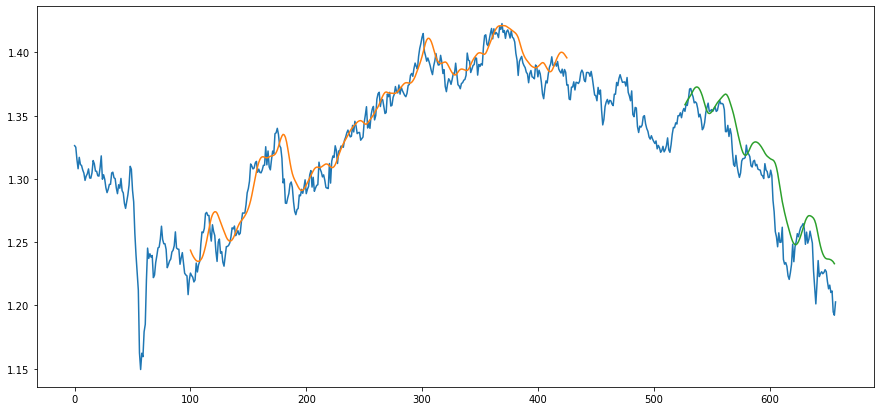

In [85]:
look_back=100
trainPredictplot = np.empty_like(df_close)
trainPredictplot[:, :]=np.nan
trainPredictplot[look_back:len(train_predict)+look_back,  :]=train_predict
testPredictionplot= np.empty_like(df_close)
testPredictionplot[:, :]= np.nan
testPredictionplot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :]=test_predict
plt.figure(figsize=(15,7))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictplot)
plt.plot(testPredictionplot)
plt.show()

In [86]:
len(test_data)

231

In [89]:
x_input=test_data[131:].reshape(1,-1)

In [90]:
x_input.shape

(1, 100)

In [91]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [92]:
temp_input #previous 100 days test data to feed the model

[0.7682050700341829,
 0.7691518021722485,
 0.7667177843850279,
 0.7507511686906518,
 0.6876359836743244,
 0.6876359836743244,
 0.7057678673876957,
 0.6736688488042599,
 0.6962913840831204,
 0.679467910361482,
 0.6287893826390265,
 0.5921229268420376,
 0.5873639617904143,
 0.6189704178928013,
 0.5888089280767161,
 0.569433204121121,
 0.5553631066775155,
 0.5680375377111337,
 0.6026731003732397,
 0.6097303994816974,
 0.60988876988083,
 0.6126159692333868,
 0.6485477259886698,
 0.6264269151147754,
 0.6226639820775315,
 0.6155368778344705,
 0.5889345773190033,
 0.5853553190421863,
 0.6018515811953691,
 0.6048226622369492,
 0.5889974019401469,
 0.5929597158931026,
 0.5793389890035101,
 0.5773997151077941,
 0.5763993202725022,
 0.5628104419755724,
 0.5598908422207636,
 0.5519574886730263,
 0.5950377274938434,
 0.5766493099108025,
 0.5720897257748918,
 0.5546196819939837,
 0.5560450155861778,
 0.5762117189732541,
 0.5606360120326599,
 0.48912894099066584,
 0.4558663580698008,
 0.3987766650160

In [94]:
#demonstrate prediction for the next 10 days
lst_output=[]
n_steps=100
i=0
while(i<30):
  if (len(temp_input)>100):
      x_input=np.array(temp_input[1:]) #SHIFT TO WRITE
      print("{}day input{}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print('{}day output {}'.format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      lst_output.extend(yhat.tolist())
      i=i+1
  else:                                             #FIRST ELSE RUN AFTER PREDICTION AND OUR DATAS BE MORE THAN 100 WE PASS TO IF
    x_input=x_input.reshape((1,n_steps,1))#FIRST OF ALL RESHAPE THE DATA
    yhat=model.predict(x_input,verbose=0) #YHAT==PREDICTION
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())# ADD YHAT TO THE PREVIOUS DATAS
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

[0.2900973]
101
1day input[0.7691518  0.76671778 0.75075117 0.68763598 0.68763598 0.70576787
 0.67366885 0.69629138 0.67946791 0.62878938 0.59212293 0.58736396
 0.61897042 0.58880893 0.5694332  0.55536311 0.56803754 0.6026731
 0.6097304  0.60988877 0.61261597 0.64854773 0.62642692 0.62266398
 0.61553688 0.58893458 0.58535532 0.60185158 0.60482266 0.5889974
 0.59295972 0.57933899 0.57739972 0.57639932 0.56281044 0.55989084
 0.55195749 0.59503773 0.57664931 0.57208973 0.55461968 0.55604502
 0.57621172 0.56063601 0.48912894 0.45586636 0.39877667 0.38335409
 0.35480641 0.39507045 0.36740624 0.36818326 0.41127091 0.31831578
 0.3045947  0.30904784 0.29820884 0.2707619  0.26048702 0.27965333
 0.30392719 0.36232355 0.3116123  0.35418122 0.36952221 0.39275684
 0.38375722 0.39954758 0.41097948 0.4150033  0.42184159 0.40789365
 0.3618672  0.39703852 0.36521741 0.3766288  0.39999389 0.38277864
 0.36546304 0.28565614 0.23802635 0.18965226 0.24884876 0.3149058
 0.26857177 0.27718005 0.28262528 0.276

In [98]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)#30days

In [95]:
len(df_close)

658

In [96]:
df3=df_close.tolist()
df3.extend(lst_output)

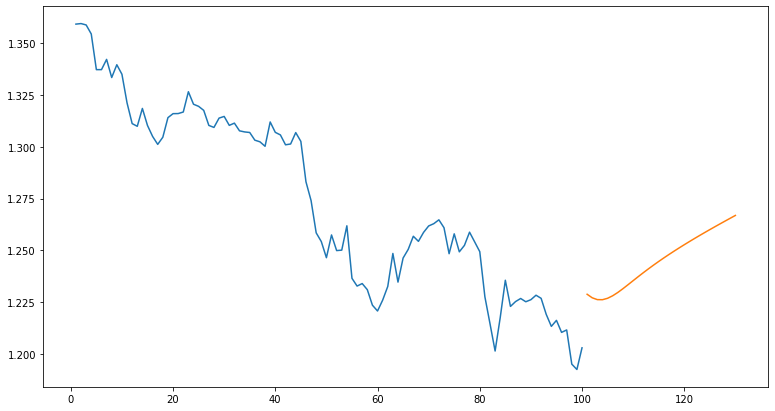

In [101]:
plt.figure(figsize=(13,7))
plt.plot(day_new,scaler.inverse_transform(df_close[558:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

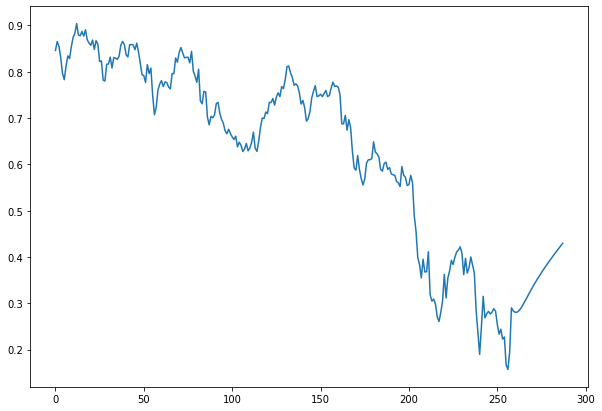

In [107]:
plt.figure(figsize=(10,7))
df3=df_close.tolist()
df3.extend(lst_output)
plt.plot(df3[400:])